In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as npy # linear algebra
import pandas as pds # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def warn (*args, **kwargs):
    pass
warnings.warn = warn

In [94]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import random
from sklearn.metrics import r2_score

import seaborn as sea
import matplotlib.pyplot as plt

In [95]:
# importing the dataset
dataset = load_iris ()

In [96]:
# converting the dataset into a Pandas-DataFrame
dfr = pds.DataFrame (data=dataset.data, columns=dataset.feature_names)
dfr['species'] = dataset.target
dfr.tail ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


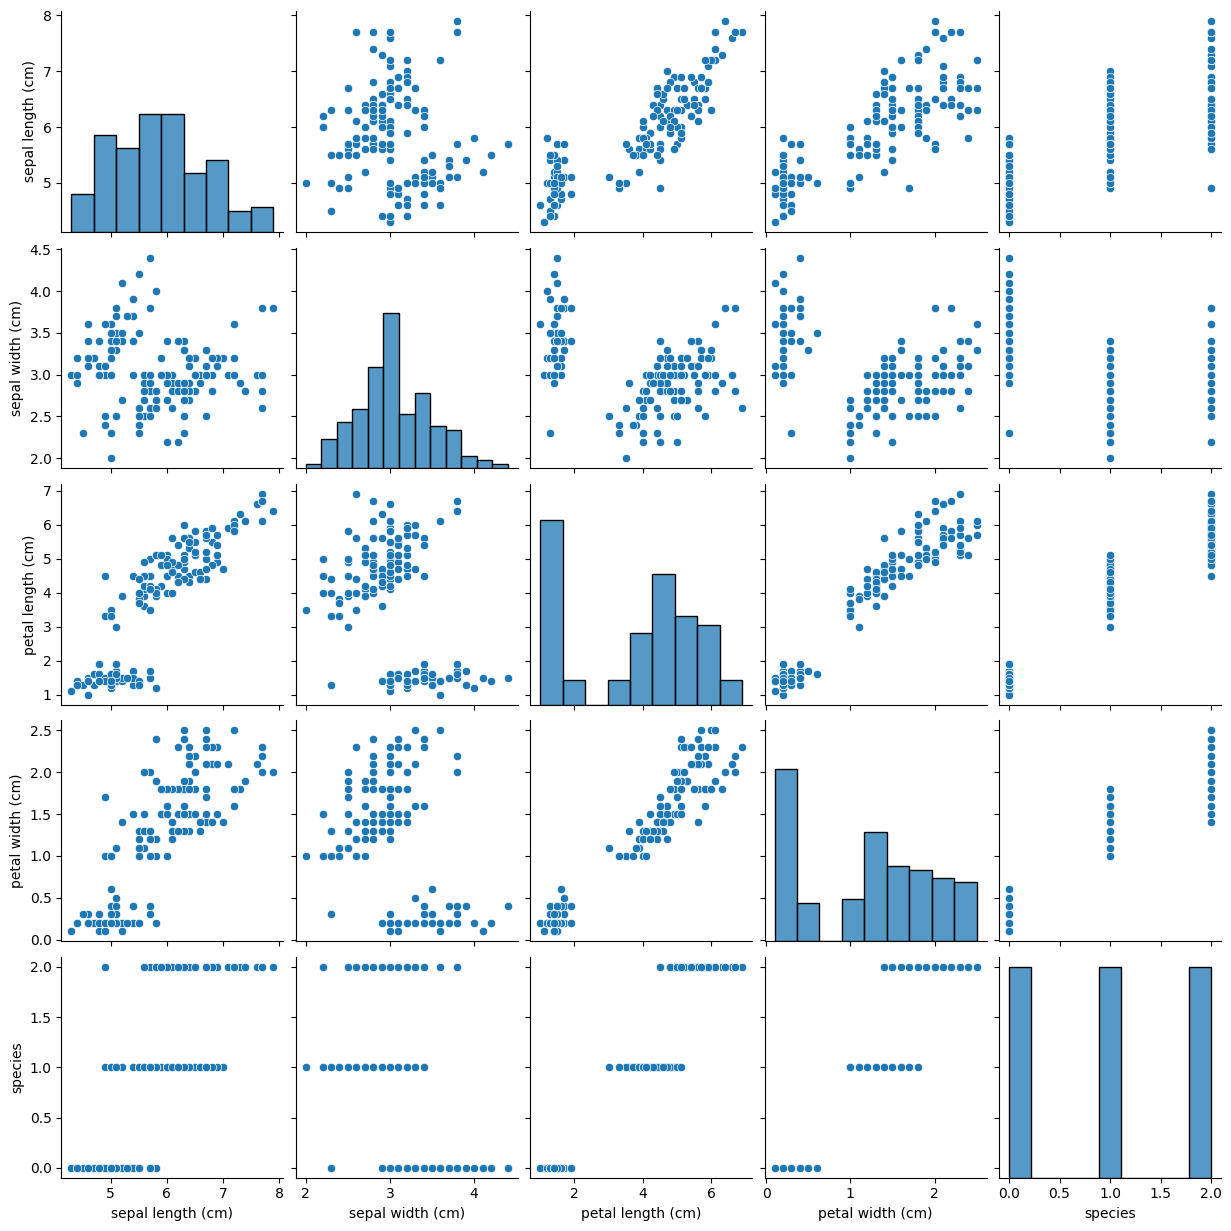

In [97]:
# exploring the features
sea.pairplot (dfr);

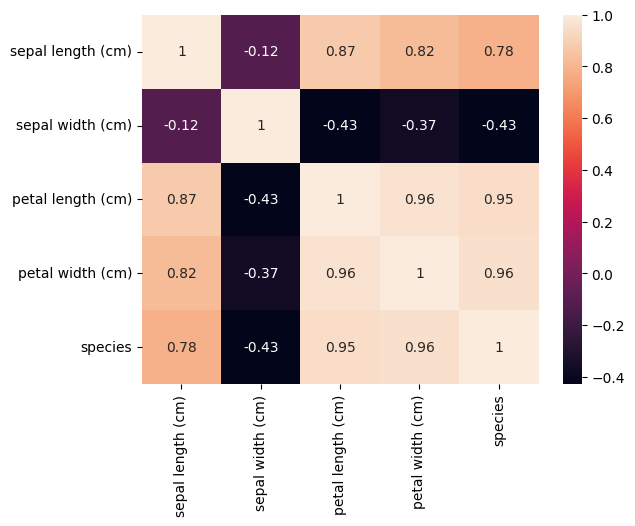

In [98]:
# looking for correlations
sea.heatmap (dfr.corr (), annot=True);

In [99]:
# extracting the required features
species_corr = dfr.corr ()['species'][:-1]
requried_features = species_corr[abs (species_corr) > 0.4].index.to_list ()
required_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<AxesSubplot: ylabel='species'>

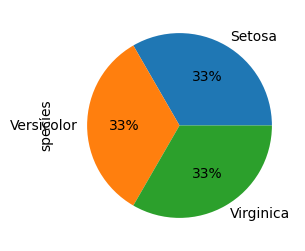

In [100]:
# species
flowers = pds.value_counts (dfr.species)
labels = ['Setosa', 'Versicolor', 'Virginica']
flowers.plot (kind='pie', labels=labels, figsize=(4, 3), autopct='%1.0f%%')

In [101]:
# splitting training and testing datasets
X = dfr[required_features]
yhat = dfr.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.3, random_state=1)

In [102]:
# fitting the model
model = LogisticRegression ()
model.fit (X_train, y_train)

LogisticRegression()

In [103]:
# checking the model accuracy with test dataset
y_pred = model.predict (X_test)
r2_score (y_pred, y_test)

0.9642857142857143

In [104]:
# flower mapping
flower_map = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

In [105]:
random_index = random.randint (0, len (dfr))
actual_flower = flower_map [dfr.iloc[random_index]['species']]
predicted_flower = flower_map[model.predict ([dfr.iloc[random_index][required_features]])[0]]

print (f'actual: {actual_flower}\npredicted: {predicted_flower}')

actual: virginica
predicted: virginica
